Group members: 
Christopher H. Nielsen, s194638
| Meriam A. Q. Al-Shawi, s194653
| Muhammad H. Kamal, s205563

## **Movie Recommendation System**

### **Research question**
Can a model be designed to predict how a person rates a movie based on the user's demographic and the user’s rating of other movies?

## **The initial model**



### **PGM**
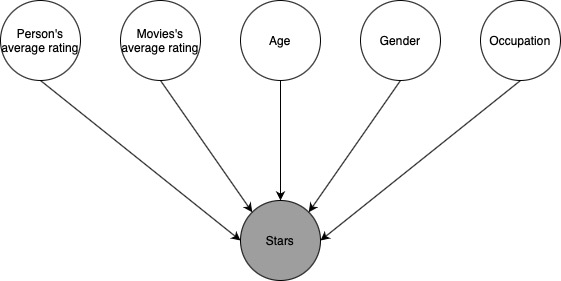

The objective of this project is to predict how a person will rate a random movie based on the demographic and ratings of other movies. The project will be based on a dataset from MovieLens. The dataset contains information about each movie, user, and 100.000 individual ratings of movies by the users. 
 
The first step of the project is to data clean and make some descriptive analysis of the dataset. The focus will also be on how to create a simple machine learning model that can predict ratings for a combination of user and movie and some thoughts about how the model can be improved. 
 
Firstly, a simple graphical illustration can be made of the features that impact the model. The demographic information about the users can be used to predict ratings. This information includes age, gender, and occupation. The movie’s average rating and the person’s average rating can also be included as features that can be used to predict the rating. 

This can be developed into a simple multiclass classification with 5 classes for each possible rating (1 to 5 stars). In this process, a PGM and the generative process can be used to define the model before it’s developed in practice.




#### **Graphical model**
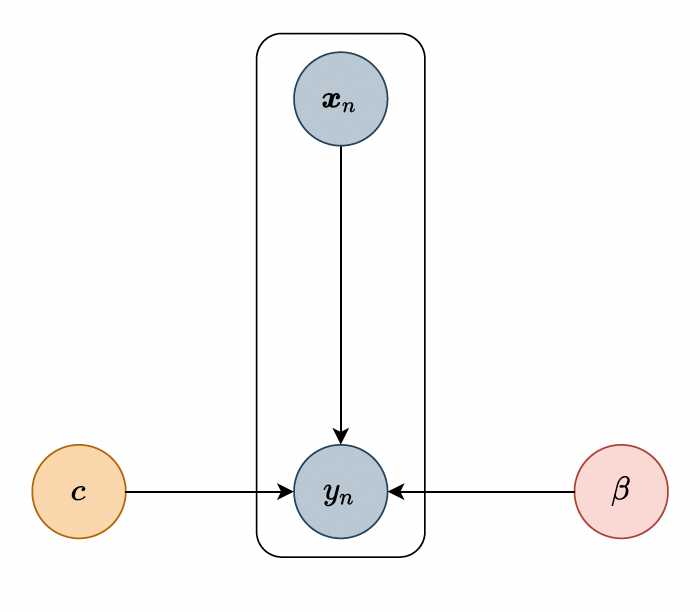

### **Generative process** 
1.   Draw coefficients $ \beta  \sim \mathcal{N}(\beta|0,\lambda I) $
2.   Draw coefficients $ c  \sim ImproperUniform $

3.   For each feature vector $x_{n}$ 
> a. Draw class $ y_{n} \sim Ordered logistic(\boldsymbol{x}_{n}{\beta}, \boldsymbol{c}) $







The next step is to first create the defined model and evaluate it to get a basis of comparison for improved models. In this process, it should also be defined how the model should be evaluated since the classes are not only categorical but are also points on a continuous line from 1 to 5. Intuitively a prediction of 4 stars is better than 1 star if the correct answer was 5 stars. It should also be considered here, which models could be used in the process since the problem could also be solved with a regression model making it important to be able to compare the performance of the 2 model types.  
 
To start, the simple model would work, but a more comprehensive model should be used to make better predictions in the completed project. The classification models could be improved further by incorporating genre. The model could have a genre bias on each prediction based on how the user rated movies with defined genres. This could include methods from hierarchical classification models.


# data visualization

In [1]:
import os
# os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=4"

!pip3 install pyro-ppl
!pip3 install numpyro
!pip3 install mord
!pip3 install ipywidgets
!pip3 install widgetsnbextension


import jax
import numpyro
import pandas as pd

numpyro.set_host_device_count(2)
print(jax.lib.xla_bridge.device_count()) # prints 1
print(jax.local_device_count()) #  prints 1


import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]
# DATASET_SIZE=1000
DATASET_SIZE=1000




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2
2


In [2]:
df_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1xKb9aLS6nkhXhHMKZR40F1cVZO9uMNXO', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_data.drop('timestamp', axis=1, inplace=True)

df_movies = pd.read_csv('https://drive.google.com/uc?export=download&id=1Nlla8ofnNifYulefs8IBqu_PweDXFaLs', sep='|', names=['movie_id', 'title', 'release_date', 'video_release_date', 'url', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
    encoding='iso-8859-1')

# drop column unknown
df_movies.drop(['unknown', "title", "release_date", "video_release_date", "url"], axis=1, inplace=True)

df_users = pd.read_csv('https://drive.google.com/uc?export=download&id=1nuWDICSd2oDUo_lj6zrAGExsbKR037TB', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip code'])
# drop column zip code
df_users.drop('zip code', axis=1, inplace=True)



## **Data Visualization**

In [3]:
'''
Genre plotting
'''
df_genre_count = df_movies[['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
#print(df_genre_count.head(10))
# change 1s to genre name 0s to None
for column in df_genre_count.columns:
    df_genre_count[column] = df_genre_count[column].apply(lambda x: column if x == 1 else None)
#print(df_genre_count.head(10))

# df to list
genre_list = df_genre_count.values.tolist()
# flatten list
genre_list_flat = [item for sublist in genre_list for item in sublist]
# remove None values to get a list of genres (multiple instances)
genre_list_flat = [item for item in genre_list_flat if item is not None]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


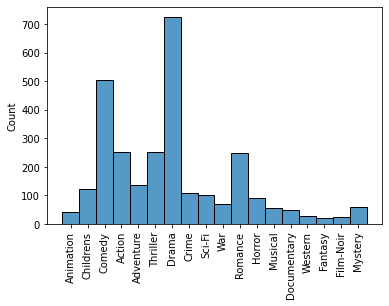

In [4]:
# plot genres histogram
plt.xticks(rotation=90)
sns.histplot(genre_list_flat, bins=len(set(genre_list_flat)))
plt.show()

In [5]:
#df = df_data.merge(df_movies, how='inner', on='movie_id')
df = df_data.merge(df_users, how='inner', on='user_id')



[1, 2, 3, 4, 5]


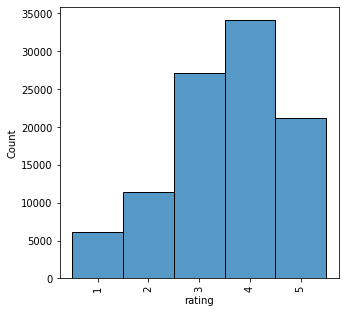

In [6]:
# plot ratings histogram
plt.rcParams["figure.figsize"] = [5, 5]
plt.xticks(rotation=90)
print(sorted(list(set(df['rating']))))
sns.histplot(df['rating'].sort_values().astype(str))
plt.show()

[7, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 73]


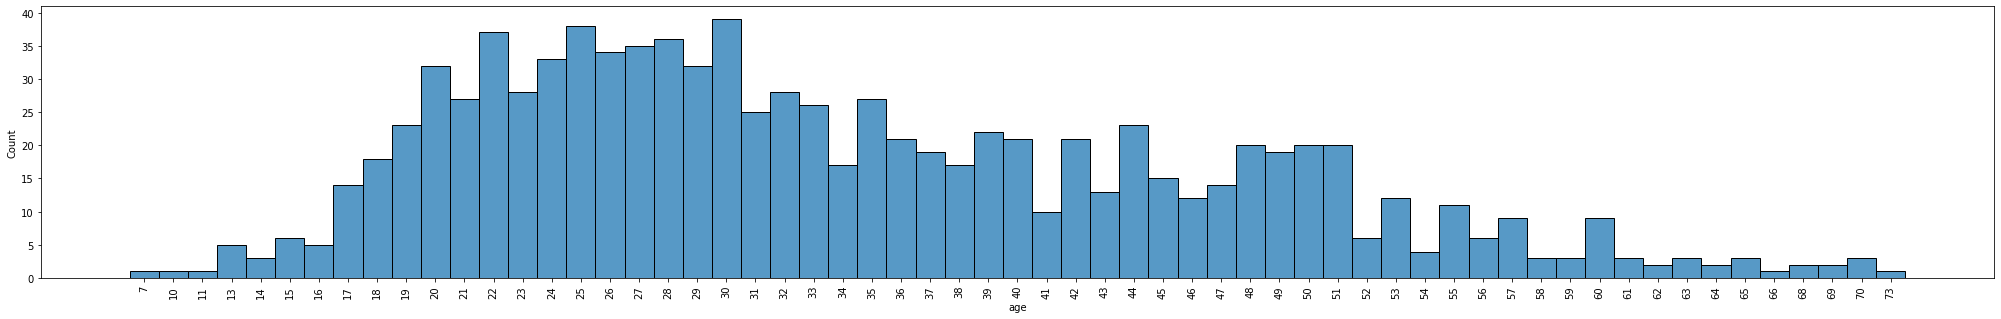

['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


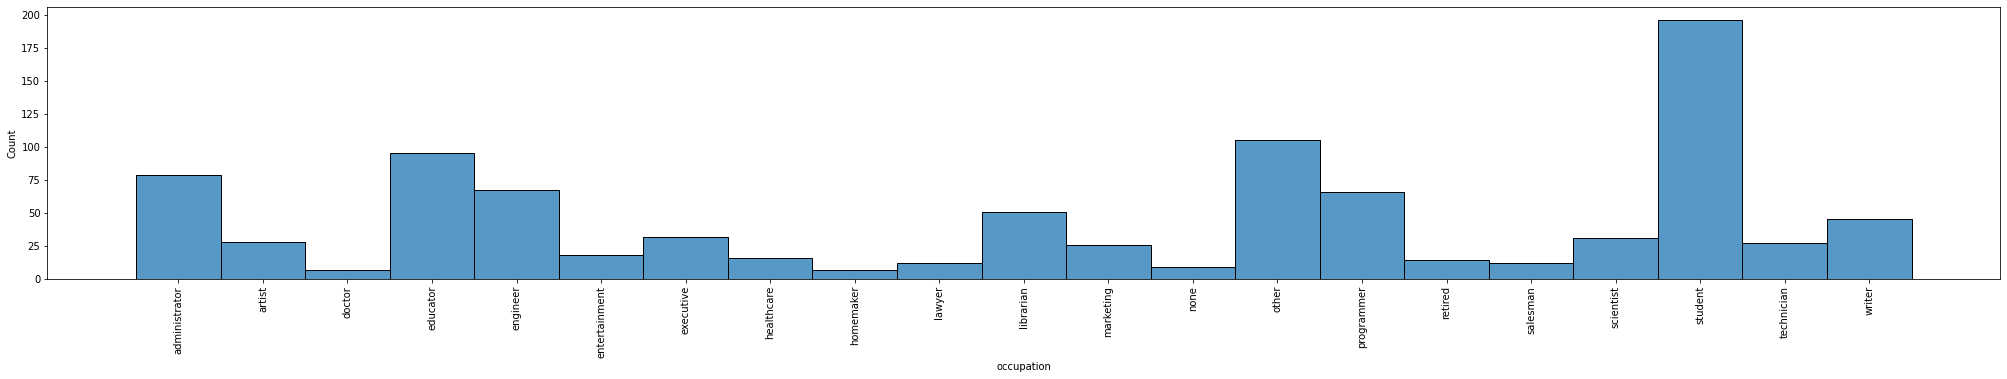

'\n[7-17]\n[18-30]\n[31-40]\n[41-55]\n[55-73]\n'

In [7]:
'''
Users plotting
'''

# plot ratings histogram
%matplotlib inline
plt.rcParams["figure.figsize"] = [35, 5]
plt.xticks(rotation=90)
print(sorted(list(set(df_users['age']))))
sns.histplot(df_users['age'].sort_values().astype(str))
plt.show()

plt.xticks(rotation=90)
print(sorted(list(set(df_users['occupation']))))
sns.histplot(df_users['occupation'].sort_values().astype(str))
plt.show()

'''
[7-17]
[18-30]
[31-40]
[41-55]
[55-73]
'''


In [8]:
df_avg_rating_by_age = df.groupby('age')["rating"].mean()
df_avg_rating_by_age.head(10)


age
7     3.767442
10    3.387097
11    2.925926
13    3.470825
14    3.375000
15    3.264484
16    3.331343
17    3.516165
18    3.696710
19    3.400968
Name: rating, dtype: float64

In [9]:
df = df.merge(df.groupby(['user_id'])['rating'].mean(), how='inner', on='user_id')
df = df.merge(df.groupby(['movie_id'])['rating_x'].mean(), how='inner', on='movie_id')

In [10]:
df = pd.merge(
    left=df,
    right=pd.get_dummies(df['gender']),
    left_index=True,
    right_index=True,
)

df = pd.merge(
    left=df,
    right=pd.get_dummies(df['occupation']),
    left_index=True,
    right_index=True,
)


In [11]:
df = df.drop(["occupation", "gender"], axis=1)
df.rename(columns = {'rating_x_x':'rating', 'rating_y':'User avg. rating', 'rating_x_y':'Movie avg. rating',}, inplace = True)
print(df.columns)
print(df.head(100))

Index(['user_id', 'movie_id', 'rating', 'age', 'User avg. rating',
       'Movie avg. rating', 'F', 'M', 'administrator', 'artist', 'doctor',
       'educator', 'engineer', 'entertainment', 'executive', 'healthcare',
       'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other',
       'programmer', 'retired', 'salesman', 'scientist', 'student',
       'technician', 'writer'],
      dtype='object')
    user_id  movie_id  rating  age  User avg. rating  Movie avg. rating  F  M  \
0       196       242       3   49          3.615385           3.991453  0  1   
1       305       242       5   23          3.409910           3.991453  0  1   
2         6       242       4   42          3.635071           3.991453  0  1   
3       234       242       4   60          3.122917           3.991453  0  1   
4        63       242       3   31          3.118280           3.991453  0  1   
..      ...       ...     ...  ...               ...                ... .. ..   
95      724       242

In [12]:

'''
GROUPS
0: [7-17]
1: [18-30]
2: [31-40]
3: [41-55]
4: [55-73]
'''

# print(X_train)

lvls=[]
for i in range(df.shape[0]):
    if df.iloc[i]['age']>=7 and df.iloc[i]['age']<=17: 
      lvls.append(0)
    elif df.iloc[i]['age']>=18 and df.iloc[i]['age']<=30: 
      lvls.append(1)
    elif df.iloc[i]['age']>=31 and df.iloc[i]['age']<=40: 
      lvls.append(2)
    elif df.iloc[i]['age']>=41 and df.iloc[i]['age']<=55: 
      lvls.append(3)
    else: 
      lvls.append(4)

# lvl = [(lambda x : x if )(x) for x in X_train]
# lvl = [(lambda x : x if (x<=num_levels) else num_levels)(x) for x in a]
# print(torch.unique(torch.tensor(y_train-1)))
print(lvls)
print(len(lvls))

[3, 1, 3, 4, 2, 1, 1, 1, 3, 2, 2, 4, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 3, 1, 2, 4, 2, 4, 1, 3, 4, 3, 3, 3, 1, 3, 0, 1, 2, 3, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 1, 2, 4, 1, 1, 3, 4, 1, 3, 3, 2, 3, 1, 4, 2, 1, 3, 1, 1, 1, 0, 3, 4, 3, 1, 3, 1, 2, 4, 1, 2, 1, 2, 3, 2, 3, 1, 1, 1, 4, 4, 1, 2, 2, 4, 4, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 4, 2, 1, 2, 1, 2, 1, 4, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 3, 3, 1, 4, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 3, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 3, 2, 2, 1, 1, 4, 2, 1, 1, 0, 1, 1, 2, 3, 3, 2, 3, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 1, 3, 4, 1, 0, 3, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 4, 2, 1, 2, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 

In [13]:
print(len(lvls))
print(df.shape)
print(df['age'].min())
print(df.shape)
# lvl = [(lambda x : x if (x['age'] in num_levels) else num_levels)(x) for x in df]

100000
(100000, 29)
7
(100000, 29)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mord import LogisticAT
import numpy as np

In [15]:
def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    accuracy = accuracy_score(predicted, trues)
    return corr, mae, rmse, r2, accuracy

In [16]:
X = df.drop(["user_id", "movie_id", "rating"], axis=1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
y = df.rating

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [44]:
regressor = LogisticAT(alpha=1.0, verbose=0)
model = regressor.fit(X_train[:DATASET_SIZE, :], y_train[:DATASET_SIZE])
y_pred = model.predict(X_test)

In [46]:
corr, mae, rae, rmse, r2 = compute_error(np.array(y_test), np.array(y_pred))
print(f"corr: {corr} \nmae: {mae} \nrae: {rae} \nrmse: {rmse} \nr2: {r2}")

corr: 0.5050731301307678 
mae: 1.165719985961914 
rae: 1.4144539833068848 
rmse: 0 
r2: 0.20452


In [20]:
from sklearn.metrics import accuracy_score
# print(y_probs.shape)
# print(y_train[:DATASET_SIZE].shape)
accuracy_score(y_test, y_pred)

0.42576

In [21]:
y_train = list(y_train)

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist
from pyro.contrib.autoguide import AutoDiagonalNormal, AutoMultivariateNormal
from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
from pyro.optim import Adam, ClippedAdam
import itertools
palette = itertools.cycle(sns.color_palette())

# fix random generator seed (for reproducibility of results)
np.random.seed(42)

# matplotlib style options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [23]:
def model(X, n_cat, obs=None):
    input_dim = X.shape[1]
    alpha = pyro.sample("alpha", dist.Normal(torch.zeros(1, n_cat), 
                                             5.*torch.ones(1, n_cat)).to_event())  # Prior for the bias/intercept
    beta  = pyro.sample("beta", dist.Normal(torch.zeros(input_dim, n_cat), 
                                            5.*torch.ones(input_dim, n_cat)).to_event()) # Priors for the regression coeffcients
    
    with pyro.plate("data"):
        y = pyro.sample("y", dist.Categorical(logits=alpha + X.matmul(beta)), obs=obs)
    
    return y

In [24]:
n_cat = 5
import jax.numpy as jnp


# Prepare data for Pyro
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train[:DATASET_SIZE,:]
y_train = y_train[:DATASET_SIZE]
print(X_train.shape)
print(y_train.shape)
y_train=y_train-1
# number of levels
num_levels=10
# CREATE lvl array of size DATASET_SIZE containing values (indices) b/w 0...num_levels
# lvl[0] = 0...10
# a=np.arange(DATASET_SIZE)
# lvl shape = (DATASET_SIZE)
lvls
print(len(lvls))
print(lvls)

(1000, 26)
(1000,)
100000
[3, 1, 3, 4, 2, 1, 1, 1, 3, 2, 2, 4, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 1, 3, 1, 2, 4, 2, 4, 1, 3, 4, 3, 3, 3, 1, 3, 0, 1, 2, 3, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 1, 2, 4, 1, 1, 3, 4, 1, 3, 3, 2, 3, 1, 4, 2, 1, 3, 1, 1, 1, 0, 3, 4, 3, 1, 3, 1, 2, 4, 1, 2, 1, 2, 3, 2, 3, 1, 1, 1, 4, 4, 1, 2, 2, 4, 4, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 4, 2, 1, 2, 1, 2, 1, 4, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 3, 3, 1, 4, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 0, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 3, 1, 3, 4, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 3, 2, 2, 1, 1, 4, 2, 1, 1, 0, 1, 1, 2, 3, 3, 2, 3, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 2, 1, 3, 4, 1, 0, 3, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 4, 2, 1, 2, 1, 3, 2, 3, 1, 1, 1, 1

In [25]:
# # Define guide function
# guide = AutoMultivariateNormal(model)

# # Reset parameter values
# pyro.clear_param_store()

# # Define the number of optimization steps
# n_steps = 40000

# # Setup the optimizer
# adam_params = {"lr": 0.001}
# optimizer = ClippedAdam(adam_params)

# # Setup the inference algorithm
# elbo = Trace_ELBO(num_particles=1)
# svi = SVI(model, guide, optimizer, loss=elbo)

# # Do gradient steps
# for step in range(n_steps):
#     elbo = svi.step(X_train, n_cat, y_train-1)
#     if step % 1000 == 0:
#         print("[%d] ELBO: %.1f" % (step, elbo))

In [26]:
# from pyro.infer import Predictive

# predictive = Predictive(model, guide=guide, num_samples=2000,
#                         return_sites=("alpha", "beta"))
# samples = predictive(X_train, n_cat, y_train-1)

In [27]:
# alpha_hat = samples["alpha"].mean(axis=0).detach().numpy()
# beta_hat = samples["beta"].mean(axis=0).detach().numpy()

In [28]:
# # make predictions for test set
# y_hat = alpha_hat + np.dot(X_test, beta_hat)
# y_hat = np.argmax(y_hat, axis=2) + 1
# y_hat = y_hat.flatten().tolist()

In [29]:
# corr, mae, rae, rmse, r2 = compute_error(y_test, y_hat)
# print(f"corr: {corr} \nmae: {mae} \nrae: {rae} \nrmse: {rmse} \nr2: {r2}")

## Resultater med MORD package
corr: 0.5167567854832049 
mae: 0.69352 
rae: 0.7345317194470257 
rmse: 0.980571262071248 
r2: 0.24116354616499336

##Ordinal Logistic Regression 

In [30]:
from jax import numpy as np, random
import numpyro
from numpyro import sample, handlers
from numpyro.distributions import (
    Categorical,
    Dirichlet,
    ImproperUniform,
    Normal,
    OrderedLogistic,
    TransformedDistribution,
    constraints,
    transforms,
)
from numpyro.infer import MCMC, NUTS
from numpyro.infer.reparam import TransformReparam

import pandas as pd
import seaborn as sns
import jax.numpy as jnp


In [31]:
# print(X_train.shape)
# print(y_train.shape)

In [32]:
def OLR_model(X, Y, nclasses=5):
    b_X_eta = sample('b_X_eta', Normal(jnp.zeros((X.shape[1], )), 
                                             5.*jnp.ones((X.shape[1], ))).to_event())

    c_y     = sample('c_y',     ImproperUniform(support=constraints.ordered_vector,
                                                batch_shape=(),
                                                event_shape=(nclasses-1,)))

    alpha = sample('alpha', Normal(jnp.zeros((1, 1)),
                                            5.*jnp.ones((1, 1))).to_event())

    with numpyro.plate('obs', X.shape[0]):
        # print(b_X_eta.shape)
        eta = alpha + jnp.matmul(X, b_X_eta) 
        sample('Y', OrderedLogistic(eta, c_y), obs=Y)


In [33]:
mcmc_key = random.PRNGKey(1234)
kernel = NUTS(OLR_model)
mcmc   = MCMC(kernel, num_warmup=250, num_samples=750, num_chains=2)
mcmc.run(mcmc_key, X_train, y_train)
mcmc.print_summary()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
 alpha[0,0]      0.19      5.16      0.20     -8.63      8.39    994.09      1.00
 b_X_eta[0]     -0.06      0.08     -0.06     -0.17      0.08   1651.54      1.00
 b_X_eta[1]      0.71      0.07      0.71      0.60      0.82   1947.96      1.00
 b_X_eta[2]      0.90      0.06      0.89      0.78      0.99   2110.42      1.00
 b_X_eta[3]     -0.04      3.57     -0.06     -5.54      5.89   1235.76      1.00
 b_X_eta[4]     -0.12      3.57     -0.14     -5.58      5.83   1232.40      1.00
 b_X_eta[5]      0.01      1.37      0.11     -2.17      2.35    129.86      1.01
 b_X_eta[6]     -0.11      0.78     -0.05     -1.36      1.25    130.55      1.01
 b_X_eta[7]     -0.07      0.38     -0.04     -0.69      0.61    132.07      1.01
 b_X_eta[8]     -0.05      1.52      0.04     -2.42      2.61    131.53      1.01
 b_X_eta[9]     -0.11      1.42      0.00     -2.35      2.36    130.80      1.01
b_X_eta[10]    

In [34]:
posterior_samples = mcmc.get_samples()
posterior_samples

{'alpha': DeviceArray([[[-7.081895  ]],
 
              [[ 7.6447153 ]],
 
              [[ 2.2720184 ]],
 
              ...,
 
              [[-0.29871798]],
 
              [[-0.8035791 ]],
 
              [[-1.6580408 ]]], dtype=float32),
 'b_X_eta': DeviceArray([[-0.26787552,  0.8074805 ,  0.95522606, ..., -1.2185861 ,
               -0.442319  , -0.8616027 ],
              [ 0.09238081,  0.5402314 ,  0.7644785 , ...,  0.44756714,
                0.17915455, -0.08614764],
              [ 0.03201657,  0.7710348 ,  1.0311356 , ...,  1.3167708 ,
                0.4542595 ,  0.4874433 ],
              ...,
              [-0.03605348,  0.8475251 ,  0.8666525 , ...,  0.07121344,
                0.04449002, -0.08597712],
              [ 0.01578244,  0.806525  ,  0.89196557, ...,  0.6727143 ,
                0.24608673,  0.18324433],
              [-0.14717269,  0.5937331 ,  0.90393203, ..., -0.3698696 ,
               -0.18914597, -0.453608  ]], dtype=float32),
 'c_y': DeviceArray([[-10.

In [35]:
print(posterior_samples['b_X_eta'].shape)
print(posterior_samples['c_y'].shape)
b_X = posterior_samples['b_X_eta']
c_y = posterior_samples['c_y']

(1500, 26)
(1500, 4)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

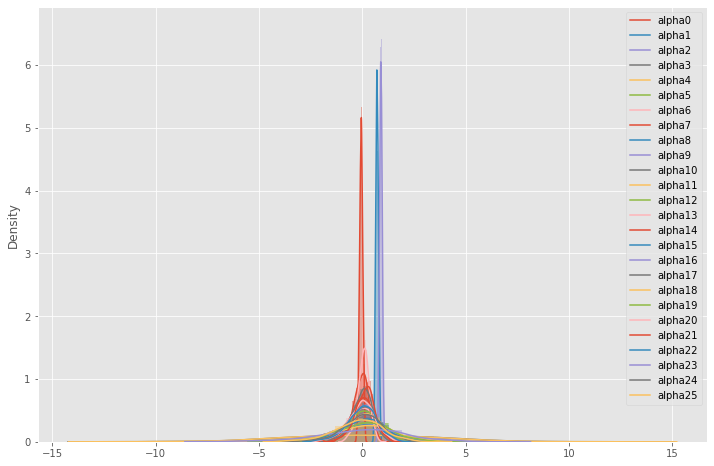

In [36]:
# n_cat=5 ### DEFINE THIS ABOVE SOMEWHERE
for c in range(b_X.shape[1]):
    sns.distplot(b_X[:,c])
plt.legend(["alpha%d" % c for c in range(b_X.shape[1])])
plt.show()

In [37]:
b_X_mean = b_X.mean(axis=0)
c_y_mean = c_y.mean(axis=0)
print(b_X_mean)
print(c_y_mean)


[-0.0583768   0.7112149   0.89542836 -0.04141536 -0.12256714  0.01484323
 -0.10821199 -0.06922091 -0.05290812 -0.11156185 -0.04942741  0.01061004
 -0.05145089  0.04925979 -0.05686671 -0.00460265 -0.0196722  -0.0069884
 -0.02555178  0.00437854 -0.05759461  0.10859627 -0.02572895 -0.01886157
 -0.01108658 -0.19769353]
[-3.2553163  -1.6373959   0.08826987  1.9481308 ]


In [38]:
Y_pred = np.dot(X_test, b_X_mean)
# print(Y_pred)
print("Y_pred", Y_pred.shape)
print("X_test", X_test.shape)
print("b_X_mean", b_X_mean.shape)
print("c_y_mean", c_y_mean.shape)
print("dot", np.dot(X_test, b_X_mean).shape)

Y_pred (25000,)
X_test (25000, 26)
b_X_mean (26,)
c_y_mean (4,)
dot (25000,)


In [39]:
### Calculation of Logit https://towardsdatascience.com/implementing-and-interpreting-ordinal-logistic-regression-1ee699274cf5
def compute_probs(X_test):
  y_probs = []
  y_probs_l = []
  for i in range(5):
    if i==4:
      y_probs.append((1 - y_probs_l[-1]))
      continue
    ### LOGIT(P(Y<=i))
    logit_p_y_l1 = c_y_mean[i] - np.dot(X_test, b_X_mean)
    ### P(Y<=i)
    p_y_1=np.exp(logit_p_y_l1)/(1+np.exp(logit_p_y_l1))
    y_probs_l.append(p_y_1)
    ### P(Y==i)
    if i==0:
      y_probs.append(p_y_1)
    else:
      y_probs.append((p_y_1 - y_probs_l[i-1]))
    
  print(y_probs)
  return y_probs

y_probs = compute_probs(X_test)
y_probs=jnp.array(y_probs).T
y_probs.shape
y_preds=[]
y_probs=jnp.argmax(y_probs, axis=1)
print(y_probs)
y_probs+=1
print("Stars predicted", y_probs, y_probs.shape)
# print('Stars predicted:', jnp.argmax(y_probs)+1) ### Argmax returns most likely classification class. Class i corresponds to i+1 stars (due to 0 indexing in class)

[DeviceArray([0.0602652 , 0.11895428, 0.01583489, ..., 0.04101853,
             0.10718547, 0.0080831 ], dtype=float32), DeviceArray([0.18409482, 0.2860998 , 0.05921008, ..., 0.13640125,
             0.26990932, 0.03138693], dtype=float32), DeviceArray([0.40055084, 0.38763568, 0.23798493, ..., 0.37036848,
             0.39563116, 0.14803897], dtype=float32), DeviceArray([0.27613223, 0.16818506, 0.43230212, ..., 0.3383208 ,
             0.1834864 , 0.40963596], dtype=float32), DeviceArray([0.0789569 , 0.0391252 , 0.254668  , ..., 0.11389095,
             0.04378766, 0.40285504], dtype=float32)]
[2 2 3 ... 2 2 3]
Stars predicted [3 3 4 ... 3 3 4] (25000,)


In [40]:
# Y_pred = np.dot(X_train, b_X_mean)

y_probs = compute_probs(X_test)
y_probs=jnp.array(y_probs).T
y_probs.shape
y_preds=[]
y_probs=jnp.argmax(y_probs, axis=1)
print(y_probs)
y_probs+=1
print("Stars predicted", y_probs, y_probs.shape)

[DeviceArray([0.0602652 , 0.11895428, 0.01583489, ..., 0.04101853,
             0.10718547, 0.0080831 ], dtype=float32), DeviceArray([0.18409482, 0.2860998 , 0.05921008, ..., 0.13640125,
             0.26990932, 0.03138693], dtype=float32), DeviceArray([0.40055084, 0.38763568, 0.23798493, ..., 0.37036848,
             0.39563116, 0.14803897], dtype=float32), DeviceArray([0.27613223, 0.16818506, 0.43230212, ..., 0.3383208 ,
             0.1834864 , 0.40963596], dtype=float32), DeviceArray([0.0789569 , 0.0391252 , 0.254668  , ..., 0.11389095,
             0.04378766, 0.40285504], dtype=float32)]
[2 2 3 ... 2 2 3]
Stars predicted [3 3 4 ... 3 3 4] (25000,)


In [43]:
compute_error(np.array(y_test), y_probs)

(DeviceArray(0.5103049, dtype=float32),
 DeviceArray(0.7158, dtype=float32),
 DeviceArray(1.006161, dtype=float32),
 DeviceArray(0.20104039, dtype=float32),
 0.41564)

# Hierarchical Ordinal Logistic Regression Model

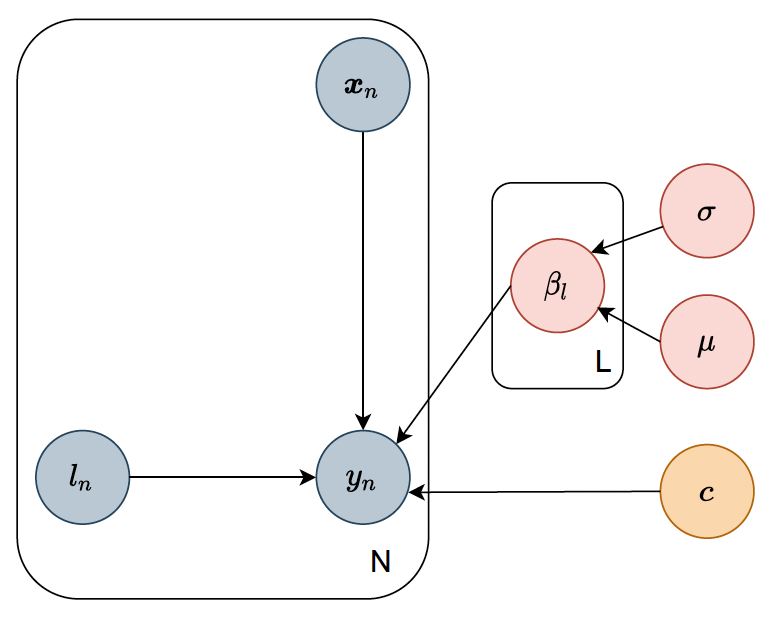

### **Generative process** 
1. Draw global mean parameters $ \mu \sim \mathcal{N}(\mu|0,\lambda I) $
2. Draw global variance parameters $ \sigma \sim \mathcal{N}(\sigma|0,\lambda I) $
3.   Draw coefficients $ c  \sim ImproperUniform(nclasses) $

4. For each level $l \in  \{1,...L\}$
> a. Draw coefficients $ \beta_{l}  \sim \mathcal{N}(\beta_{l}|\mu,e^σ I) $


5.   For each feature vector $x_{n}$ 
> a. Draw class $ y_{n} \sim Ordered logistic(y_{n}|\boldsymbol{x}_{n}{\beta}_{l_n}, \boldsymbol{c})) $

##Hierarchical Ordinal Logistic Regression 

In [ ]:
from jax import numpy as np, random
import numpyro
from numpyro import sample, handlers
from numpyro.distributions import (
    Categorical,
    Dirichlet,
    ImproperUniform,
    Normal,
    OrderedLogistic,
    TransformedDistribution,
    constraints,
    transforms,
    HalfCauchy
)
from numpyro.infer import MCMC, NUTS
from numpyro.infer.reparam import TransformReparam

import pandas as pd
import seaborn as sns
import jax.numpy as jnp


In [ ]:


# from sklearn.cluster import KMeans
# df=df.drop(['title', 'release_date', 'video_release_date', 'url', 'gender'], 1)
# df=df.drop('')
# release_date	video_release_date	url	
# kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(df)

In [ ]:
def OLR_model(X, Y, lvl, nclasses=5, n_levels=5):

    # mu = sample('mu', Normal(loc=0, scale=5.))
    # sig = sample('sig', Normal(loc=0, scale=5.))
    mu = sample('mu', Normal(jnp.zeros((X.shape[1], )), 
                                           5.*jnp.ones((X.shape[1], ))).to_event())
    
    sig = sample('sig', Normal(jnp.zeros((X.shape[1], )), 
                                           5.*jnp.ones((X.shape[1], ))).to_event())

    c_y     = sample('c_y',     ImproperUniform(support=constraints.ordered_vector,
                                                batch_shape=(),
                                                event_shape=(nclasses-1,)))

    # alpha_mu = sample('alpha_mu', Normal(jnp.zeros((nclasses)),
    #                                         5.*jnp.ones((nclasses))).to_event())
    
    # alpha_sigma = sample('alpha_sigma', HalfCauchy(10.*jnp.ones((nclasses))).to_event())

    


    # shape: n_levels, 26
    with numpyro.plate("levels", n_levels):
        b_X_eta = sample('b_X_eta', Normal(mu, sig).to_event())
        # b_X_eta = sample('b_X_eta', Normal(jnp.zeros((26, )), 
        #                                    5.*jnp.ones((26, ))).to_event())
    
    #### Below doesn't work with NUTS
    # with numpyro.plate('obs', X.shape[0], subsample_size=1) as n:
    #     print("X shape")
    #     print(X.shape)
    #     print("calc shape")
    #     print(b_X_eta[lvl[n]].shape)
    #     print("beta shape")
    #     print(b_X_eta.shape)
    #     eta = jnp.matmul(X, b_X_eta[lvl[n]].T)
    #     sample('Y', OrderedLogistic(eta, c_y), obs=Y)

    with numpyro.plate('obs', X.shape[0]):
        # print("X shape")
        # print(X.shape)
        # print("calc shape")
        # print(b_X_eta[lvl].shape)
        """
        X_shape=100, 26
        b_shape=10,26 (10 levels)
        lvl.shape=100 (containing indices so range of values is 0...10) (lvl[i] gives level the i'th person belongs to)
        Non-vectorized:
        X[i]*b[lvl[i]] = (100, 26) * (26,100) = 100x100
        Vectorized:
        X*b[lvl] = (100, 26) * (26, 100) = 100x100 where, y[i]= (X*b[lvl])[i][i]
        """
        # print("beta shape")
        # print(b_X_eta.shape)
        # print("b_X_eta shape")
        # print(b_X_eta[lvl].shape)
        eta = jnp.matmul(X, b_X_eta[lvl].T)
        sample('Y', OrderedLogistic(eta, c_y), obs=Y)

In [ ]:
mcmc_key = random.PRNGKey(1234)
kernel = NUTS(OLR_model)
mcmc   = MCMC(kernel, num_warmup=250, num_samples=750, num_chains=2)
mcmc.run(mcmc_key, X_train,y_train, np.array(lvls[:DATASET_SIZE]), n_levels=max(lvls[:DATASET_SIZE]))
mcmc.print_summary()

In [ ]:
posterior_samples = mcmc.get_samples()
posterior_samples

In [ ]:
print(posterior_samples['b_X_eta'].shape)
print(posterior_samples['c_y'].shape)
b_X = posterior_samples['b_X_eta']
c_y = posterior_samples['c_y']

In [ ]:
# n_cat=5 ### DEFINE THIS ABOVE SOMEWHERE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#!/usr/bin/env python -W ignore::DeprecationWarning
for l in range(num_levels):
  for c in range(b_X.shape[-1]):
      sns.distplot(b_X[:,l,c])
  plt.legend(["alpha%d" % c for c in range(b_X.shape[-1])])
  plt.show()

# n_cat=5 ### DEFINE THIS ABOVE SOMEWHERE
# for c in range(b_X.shape[-1]):
#     sns.distplot(b_X[:,0,c])
# plt.legend(["alpha%d" % c for c in range(b_X.shape[-1])])
# plt.show()

In [ ]:
b_X_mean = b_X.mean(axis=0)
c_y_mean = c_y.mean(axis=0)
print(b_X_mean.shape)
print(c_y_mean.shape)
print(X_test.shape)

# CREATE lvl array of size DATASET_SIZE containing values (indices) b/w 0...num_levels
'''
Dummy, remove this.
'''
# num_levels=10
# a=np.arange(X_test.shape[0])
# # lvl shape = (DATASET_SIZE) 
# lvl = [(lambda x : x if (x<=num_levels) else num_levels)(x) for x in a]
# print(np.array(lvl).shape)

In [ ]:
print(b_X_mean[np.array(lvls)].shape)
Y_pred = np.dot(X_test, b_X_mean[np.array(lvls)].T)
print(Y_pred.shape)
### See note above on vectorization for explanation on why we need diagonal
Y_pred = Y_pred.diagonal()
# print(Y_pred)
print("Y_pred", Y_pred.shape)
print("X_test", X_test.shape)
print("b_X_mean", b_X_mean.shape)
print("c_y_mean", c_y_mean.shape)
# print("dot", np.dot(X_test, b_X_mean).shape)

In [ ]:
### Calculation of Logit https://towardsdatascience.com/implementing-and-interpreting-ordinal-logistic-regression-1ee699274cf5

### P(Y<=1) LOGITS
logit_p_y_l1 = c_y_mean[0] - Y_pred
print(logit_p_y_l1.shape)
### LOGITS TO PROBS
p_y_1=np.exp(logit_p_y_l1)/(1+np.exp(logit_p_y_l1))
print(p_y_1)
print("prob y=1 for x[0]",p_y_1[0])
### P(Y<=2) LOGITS
logit_p_y_l2 = c_y_mean[1] - Y_pred
print(logit_p_y_l2.shape)
### LOGITS TO PROBS
p_y_l2=np.exp(logit_p_y_l2)/(1+np.exp(logit_p_y_l2))
print(p_y_l2)
print(p_y_l2[0])
p_y_2 = p_y_l2 - p_y_1
print("prob y=2 for x[0]", p_y_2[0])


### P(Y<=3) LOGITS
logit_p_y_l3 = c_y_mean[2] - Y_pred
print(logit_p_y_l3.shape)
### LOGITS TO PROBS
p_y_l3=np.exp(logit_p_y_l3)/(1+np.exp(logit_p_y_l3))
print(p_y_l3)
print(p_y_l3[0])
p_y_3 = p_y_l3 - p_y_l2 # P(Y==3) = P(Y<=3) - P(Y<=2)
print("prob y=3 for x[0]", p_y_3[0])

### P(Y<=4) LOGITS
logit_p_y_l4 = c_y_mean[3] - Y_pred
print(logit_p_y_l4.shape)
### LOGITS TO PROBS
p_y_l4=np.exp(logit_p_y_l4)/(1+np.exp(logit_p_y_l4))
print(p_y_l4)
print(p_y_l4[0])
p_y_4 = p_y_l4 - p_y_l3 # P(Y==4) = P(Y<=4) - P(Y<=3)
print("prob y=4 for x[0]", p_y_4[0])


### P(Y<=5) LOGITS
p_y_5 = 1 - p_y_l4 # P(Y==5) = 1 - P(Y<=4)
print("prob y=5 for x[0]", p_y_5[0])

assert p_y_1[0]+p_y_2[0]+p_y_3[0]+p_y_4[0]+p_y_5[0]==1.0 ### Confirm probs sum to 1 ...


In [ ]:
### Calculation of Logit https://towardsdatascience.com/implementing-and-interpreting-ordinal-logistic-regression-1ee699274cf5
def compute_probs():
  y_probs = []
  y_probs_l = []
  for i in range(5):
    if i==4:
      y_probs.append((1 - y_probs_l[-1]))
      continue
    ### LOGIT(P(Y<=i))
    logit_p_y_l1 = c_y_mean[i] - Y_pred
    ### P(Y<=i)
    p_y_1=np.exp(logit_p_y_l1)/(1+np.exp(logit_p_y_l1))
    y_probs_l.append(p_y_1)
    ### P(Y==i)
    if i==0:
      y_probs.append(p_y_1)
    else:
      y_probs.append((p_y_1 - y_probs_l[i-1]))
    
  print(y_probs)
  return y_probs

y_probs = compute_probs()
y_probs=jnp.array(y_probs).T
y_probs.shape
y_preds=[]
y_probs=jnp.argmax(y_probs, axis=1)
print(y_probs)
y_probs+=1
print("Stars predicted", y_probs, y_probs.shape)
# print('Stars predicted:', jnp.argmax(y_probs)+1) ### Argmax returns most likely classification class. Class i corresponds to i+1 stars (due to 0 indexing in class)

In [ ]:
y_probs[0]
print(np.array(y_test[:1000]))

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy_score(y_test[:1000], y_probs)
compute_error(np.array(y_test), y_probs)